# 2440016804 - Rio Pramana - LA01 - Assignment 3

Import libraries & read downloaded dataset from https://www.kaggle.com/jojoker/singapore-airbnb

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "listings.csv"
listings_df = pd.read_csv(csv_path)

Checking the dataset

In [3]:
listings_df.shape

(7907, 16)

In [4]:
listings_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [5]:
listings_new = listings_df.copy()
listings_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

## 1. Extracting discrete and continuous random variables from Singapore Airbnb Data

In [6]:
listings_new.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


Menurut saya, yang termasuk discrete random variables adalah:
1. price (Walaupun biasanya price dianggap continuous, dalam dataset ini price berisi data integer saja sehingga bisa dianggap discrete)
2. minimum_nights
3. number_of_reviews
4. calculated_host_listings_count
5. availability_365

#### Extracting discrete random variables:

In [7]:
discrete = listings_df[["price","minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]]
discrete

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,83,180,1,2,365
1,81,90,18,1,365
2,69,6,20,2,365
3,206,1,14,9,353
4,94,1,22,9,355
...,...,...,...,...,...
7902,100,3,0,31,61
7903,550,6,0,34,365
7904,58,30,0,3,173
7905,56,14,0,2,30


Menurut saya, yang termasuk continuous random variables adalah:
1. latitude
2. longitude
3. reviews_per_month

#### Extracting continuous random variables:

In [8]:
continu = listings_df[["latitude","longitude","reviews_per_month"]]
continu

,latitude,longitude,reviews_per_month
0,1.44255,103.79580,0.01
1,1.33235,103.78521,0.28
2,1.44246,103.79667,0.20
3,1.34541,103.95712,0.15
4,1.34567,103.95963,0.22
...,...,...,...
7902,1.27973,103.78751,NaN
7903,1.29269,103.82623,NaN
7904,1.31286,103.85996,NaN
7905,1.29543,103.83801,NaN


## 2. Calculated PMF (probability mass function) for discrete random variables (only 1 variable)

Selected variable = availability_365

In [9]:
pmf_sample = discrete.availability_365.values
pmf_sample

array([365, 365, 365, ..., 173,  30, 365], dtype=int64)

In [10]:
# Menggunakan data yang sudah ada pada dataset
val, cnt = np.unique(pmf_sample, return_counts=True)
prop = cnt / len(pmf_sample)

# 3. Plot Histogram/Bar for No.2 Result

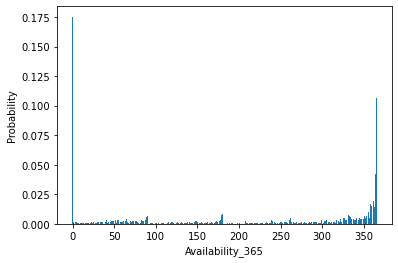

In [11]:
# plot the results
plt.bar(val, prop)
plt.ylabel("Probability")
plt.xlabel("Availability_365")
plt.show()

## 4. Calculated PDF (probability density function) for Continuous random variables (only 1 variable)

Selected variable = reviews_per_month

In [12]:
pdf_sample = continu.reviews_per_month
pdf_sample

0       0.01
1       0.28
2       0.20
3       0.15
4       0.22
        ... 
7902     NaN
7903     NaN
7904     NaN
7905     NaN
7906     NaN
Name: reviews_per_month, Length: 7907, dtype: float64

In [13]:
pdf_sample.min()

0.01

In [14]:
pdf_sample.max()

13.0

In [15]:
from numpy import mean
from numpy import std
# calculate parameters
pdf_sample_mean = mean(pdf_sample)
pdf_sample_std = std(pdf_sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (pdf_sample_mean, pdf_sample_std))

Mean=1.044, Standard Deviation=1.286


In [16]:
# define the distribution
dist = norm(pdf_sample_mean, pdf_sample_std)

In [17]:
# sample probabilities for a range of outcomes
values = [value for value in range(0, 14)]
probabilities = [dist.pdf(value) for value in values]

## 5. Plot Histogram for No.4 Result

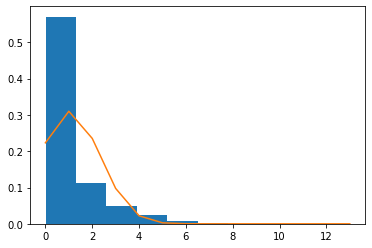

In [18]:
# plot the histogram and pdf
plt.hist(pdf_sample, bins=10, density=True)
plt.plot(values, probabilities)
plt.show()

## Alternative solution for number 4 and 5 (By handling missing data from reviews_per_month column)

Untuk kolom reviews_per_month, kita menghandle missing data dengan mereplace missing data tersebut menggunakan mode dari kolom reviews_per_month karena lebih optimal jika kita menggunakan reviews_per_month yang paling sering muncul untuk menghindari kemungkinan penurunan akurasi dalam jumlah yang besar

In [19]:
clean_pdf_sample = pdf_sample.copy()
clean_pdf_sample.fillna(clean_pdf_sample.mode()[0], inplace = True)
clean_pdf_sample.value_counts()

1.00    2930
0.04     104
0.08      96
0.05      93
0.10      92
        ... 
4.02       1
3.92       1
3.52       1
3.57       1
8.00       1
Name: reviews_per_month, Length: 527, dtype: int64

In [20]:
clean_pdf_sample.isnull().sum()

0

In [21]:
# calculate parameters
clean_pdf_sample_mean = mean(clean_pdf_sample)
clean_pdf_sample_std = std(clean_pdf_sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (clean_pdf_sample_mean, clean_pdf_sample_std))

Mean=1.028, Standard Deviation=1.038


In [22]:
# define the distribution
clean_dist = norm(clean_pdf_sample_mean, clean_pdf_sample_std)

In [23]:
# sample probabilities for a range of outcomes
clean_values = [value for value in range(0, 14)]
clean_probabilities = [clean_dist.pdf(value) for value in clean_values]

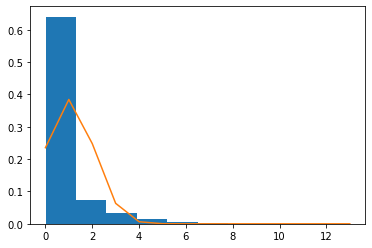

In [24]:
# plot the histogram and pdf
plt.hist(clean_pdf_sample, bins=10, density=True)
plt.plot(clean_values, clean_probabilities)
plt.show()